In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('premier-player-23-24.csv')
data.head()

,Player,Nation,Pos,NewPos,Age,MP,Starts,Min,90s,Gls,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,MF,27,34,34,2931,32.6,8,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",FW,23,35,33,2857,31.7,19,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,GK,29,33,33,2785,30.9,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",MF,23,36,31,2647,29.4,11,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,DF,33,32,30,2767,30.7,0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [3]:
#Load dataset and create relevant dataframe
data = pd.read_csv('premier-player-23-24.csv')
relevant_columns = ['Player', 'NewPos', 'MP', 'Gls', 'Ast', 'G+A', 'xG', 'xAG', 'Age', 'CrdY', 'CrdR', 'PrgC', 'PrgP', 'PrgR']
rdf = data[relevant_columns] #usable dataframe
ddf = data[relevant_columns] #relevant dataframe copy
rdf.head()

,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172


In [4]:
#Calculate Fantasy Points
def calculate_fantasy_points(row):
    # Initialize fantasy points to 0
    points = 0

    # Add points for goals
    points += row['Gls'] * 5  # 5 points per goal

    # Add points for assists
    points += row['Ast'] * 3  # 3 points per assist

    # Add points for expected goals (xG) and expected assists (xAG)
    points += row['xG'] * 2  # 2 points for each expected goal
    points += row['xAG'] * 1  # 1 point for each expected assist

    # Add points for minutes played (MP)
    points += (row['MP'] / 90) * 1  # 1 point per 90 minutes played

    # Subtract points for age (subtract 0.1 points for each year above 30)
    if row['Age'] > 30:
        points -= (row['Age'] - 30) * 0.1  # Penalize older players

    # Penalize for yellow and red cards
    points -= row['CrdY'] * 1  # -1 point per yellow card
    points -= row['CrdR'] * 3  # -3 points per red card

    # Add points for progressive actions (carries, passes, runs)
    points += row['PrgC'] * 0.5  # 0.5 points per progressive carry
    points += row['PrgP'] * 0.5  # 0.5 points per progressive pass
    points += row['PrgR'] * 0.5  # 0.5 points per progressive run

    return points

rdf['FantasyPoints'] = rdf.apply(calculate_fantasy_points, axis=1)
rdf.head()

<ipython-input-4-0f65ac62003a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['FantasyPoints'] = rdf.apply(calculate_fantasy_points, axis=1)


,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR,FantasyPoints
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55,321.977778
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269,411.388889
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0,-2.533333
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180,283.300000
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172,214.955556


In [5]:
# Filter players by position
forwards = rdf[rdf['NewPos'] == 'FW']
midfielders = rdf[rdf['NewPos'] == 'MF']
defenders = rdf[rdf['NewPos'] == 'DF']
goalkeepers = rdf[rdf['NewPos'] == 'GK']


forwards[['Player', 'FantasyPoints']].head()


,Player,FantasyPoints
1,Phil Foden,411.388889
6,Erling Haaland,305.544444
11,Jeremy Doku,330.922222
15,Jack Grealish,160.422222
19,Oscar Bobb,50.155556


In [6]:
def calculate_player_cost(row):
    # Define the base cost for each position
    position_base_cost = {
        'FW': 12,  # Forwards
        'MF': 10,  # Midfielders
        'DF': 8,   # Defenders
        'GK': 6    # Goalkeepers
    }

    # Get the base cost based on the player's position
    base_cost = position_base_cost.get(row['NewPos'], 8)  # Default to 8 if position not found

    # Calculate the total of xG and xAG
    performance_goals_points = row['xG']
    performance_assists_points = row['xAG']

    # Define the multiplier for performance (can be adjusted based on league rules)
    performance_multiplier_goals = 1  # Example multiplier
    performance_multiplier_assists = 0.5

    # Calculate total cost
    total_cost = base_cost + (performance_goals_points * performance_multiplier_goals) + (performance_assists_points * performance_multiplier_assists)

    return total_cost

# Apply the function to calculate player costs and create a new column in the DataFrame
rdf['PlayerCost'] = rdf.apply(calculate_player_cost, axis=1)

# Show the updated DataFrame
rdf[['Player', 'NewPos', 'xG', 'xAG', 'PlayerCost']].head(10)


<ipython-input-6-276c9cad5de0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['PlayerCost'] = rdf.apply(calculate_player_cost, axis=1)


,Player,NewPos,xG,xAG,PlayerCost
0,Rodri,MF,4.1,3.9,16.05
1,Phil Foden,FW,10.3,8.4,26.50
2,Ederson,GK,0.0,0.1,6.05
3,Julián Álvarez,MF,13.0,6.4,26.20
4,Kyle Walker,DF,0.4,2.6,9.70
5,Bernardo Silva,MF,3.7,7.6,17.50
6,Erling Haaland,FW,29.2,4.3,43.35
7,Rúben Dias,DF,1.4,0.3,9.55
8,Manuel Akanji,DF,1.9,0.5,10.15
9,Joško Gvardiol,DF,3.1,1.4,11.80


In [7]:
rdf.head()

,Player,NewPos,MP,Gls,Ast,G+A,xG,xAG,Age,CrdY,CrdR,PrgC,PrgP,PrgR,FantasyPoints,PlayerCost
0,Rodri,MF,34,8,9,17,4.1,3.9,27,8,1,76,376,55,321.977778,16.05
1,Phil Foden,FW,35,19,8,27,10.3,8.4,23,2,0,93,168,269,411.388889,26.50
2,Ederson,GK,33,0,0,0,0.0,0.1,29,5,0,0,4,0,-2.533333,6.05
3,Julián Álvarez,MF,36,11,8,19,13.0,6.4,23,2,0,64,103,180,283.300000,26.20
4,Kyle Walker,DF,32,0,4,4,0.4,2.6,33,2,0,74,157,172,214.955556,9.70


In [ ]:
rdf.to_csv('newpldata.csv')

In [8]:
import pandas as pd

def select_fantasy_team(rdf, budget=200):
    # Step 1: Sort players by cost efficiency (Fantasy Points / Player Cost)
    rdf["CostEfficiency"] = rdf["FantasyPoints"] / rdf["PlayerCost"]

    # Step 2: Filter by position
    gks = rdf[rdf["NewPos"] == "GK"].sort_values(by="CostEfficiency", ascending=False)
    dfs = rdf[rdf["NewPos"] == "DF"].sort_values(by="CostEfficiency", ascending=False)
    mfs = rdf[rdf["NewPos"] == "MF"].sort_values(by="CostEfficiency", ascending=False)
    fws = rdf[rdf["NewPos"] == "FW"].sort_values(by="CostEfficiency", ascending=False)

    # Step 3: Select best cost-efficient players
    team = []
    team.append(gks.iloc[0].to_dict())  # 1 Goalkeeper
    team += list(dfs.iloc[:4].to_dict(orient="records"))  # 4 Defenders
    team += list(mfs.iloc[:3].to_dict(orient="records"))  # 3 Midfielders
    team += list(fws.iloc[:3].to_dict(orient="records"))  # 3 Forwards

    # Step 4: Check budget
    total_cost = sum(player["PlayerCost"] for player in team)
    while total_cost > budget:
        # Find the least cost-efficient player to replace
        worst_player = min(team, key=lambda p: p["CostEfficiency"])
        pos = worst_player["NewPos"]

        # Find a cheaper replacement
        replacement = rdf[(rdf["NewPos"] == pos) & (rdf["PlayerCost"] < worst_player["PlayerCost"])].sort_values(by="CostEfficiency", ascending=False)

        if not replacement.empty:
            new_player = replacement.iloc[0].to_dict()
            team.remove(worst_player)
            team.append(new_player)
            total_cost = sum(player["PlayerCost"] for player in team)
        else:
            break  # If no valid replacement, stop

    # Convert the final team to a DataFrame with only relevant columns
    team_df = pd.DataFrame(team)[["Player", "NewPos", "FantasyPoints", "PlayerCost"]]
    return team_df

# Run the function
selected_team = select_fantasy_team(rdf)
selected_team


<ipython-input-8-3109bae36312>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf["CostEfficiency"] = rdf["FantasyPoints"] / rdf["PlayerCost"]


,Player,NewPos,FantasyPoints,PlayerCost
0,Mark Flekken,GK,3.411111,6.25
1,Kyle Walker,DF,214.955556,9.70
2,Antonee Robinson,DF,229.011111,10.80
3,Ben White,DF,229.611111,11.10
4,Nélson Semedo,DF,190.200000,10.15
5,Bernardo Silva,MF,352.866667,17.50
6,Rodri,MF,321.977778,16.05
7,Martin Ødegaard,MF,411.288889,22.20
8,Jeremy Doku,FW,330.922222,16.80
9,Dejan Kulusevski,FW,401.000000,20.55


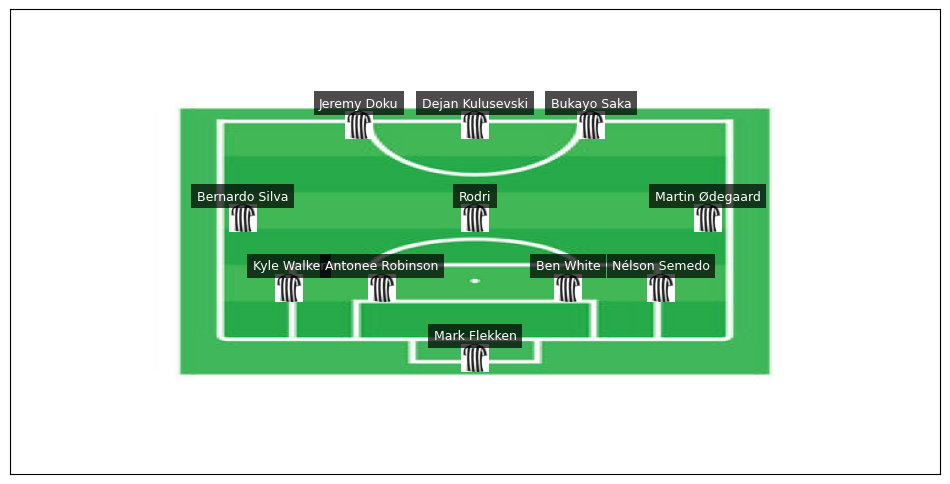

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_fantasy_team(selected_team):
    # Load the pitch and kit images
    pitch_img = mpimg.imread('football_half.jpg')
    kit_img = mpimg.imread('kit.jpeg')

    # Set up figure and axes
    fig, ax = plt.subplots(figsize=(12, 11))  # Adjust figure size
    ax.set_xlim(0, 200)  # Full width of the half-pitch
    ax.set_ylim(0, 100)  # Full height of the half-pitch

    # Display the pitch image (Ensure it's visible)
    ax.imshow(pitch_img, extent=[0, 200, 0, 100], zorder=0)

    # Define positions for players (x, y coordinates)
    positions = {
        "GK": (100, 25),  # Goalkeeper near the goal line
        "DF1": (60, 40), "DF2": (80, 40), "DF3": (120, 40), "DF4": (140, 40),  # Defenders in front of GK
        "MF1": (50, 55), "MF2": (100, 55), "MF3": (150, 55),  # Midfielders in central area
        "FW1": (75, 75), "FW2": (100, 75), "FW3": (125, 75)  # Forwards near the center circle
    }

    # Assign players to positions from the DataFrame
    players = {pos: name for pos, name in zip(positions.keys(), selected_team["Player"])}

    # Overlay jerseys and player names
    for pos, (x, y) in positions.items():
        player_name = players.get(pos, "Unknown")  # Default to "Unknown" if missing

        # Display player kit (smaller and well-spaced)
        ax.imshow(kit_img, extent=[x-3, x+3, y-3, y+3], zorder=1)  # Adjust kit size

        # Add player name above kit
        ax.text(x, y+4, player_name, fontsize=9, color="white", ha="center",
                bbox=dict(facecolor="black", alpha=0.7, edgecolor="none"))

    # Hide axes for a clean look
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Call function with selected team
plot_fantasy_team(selected_team)


###Predictive Modeling with Machine Learning
1. Split your data into training and testing sets.
2. Compare and study the performance of models and choose the best one.
3. Train a regression model (e.g., Linear Regression or Random Forest) using features such as xG, xAG, and any other available metrics.
4. Evaluate the model performance using metrics like RMSE or R².

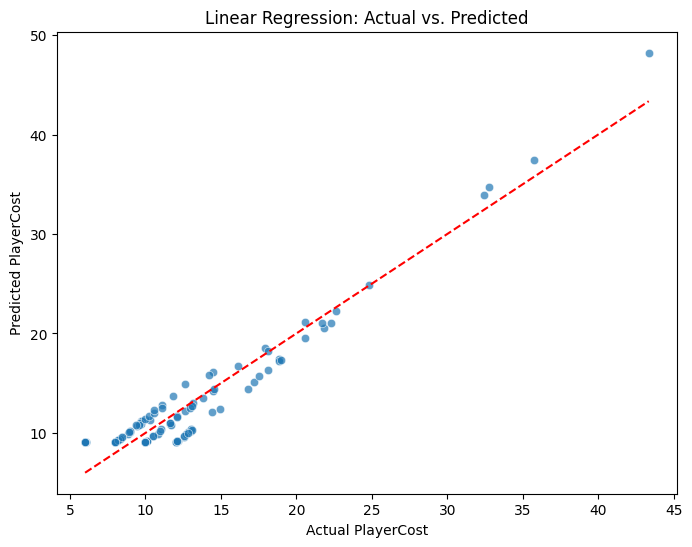

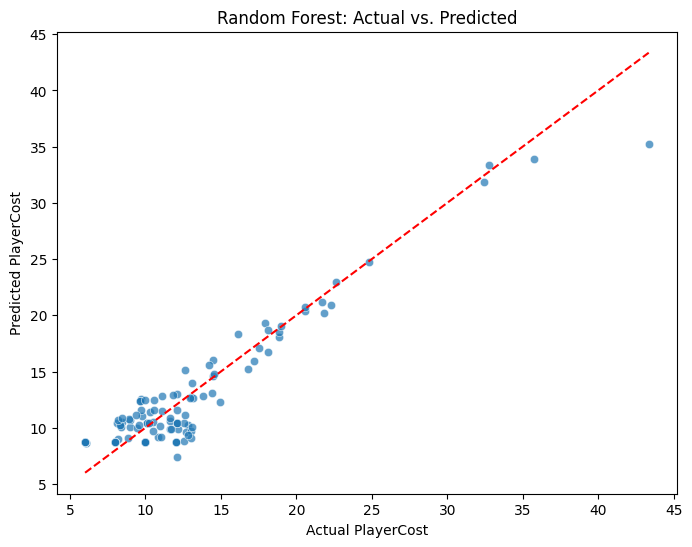

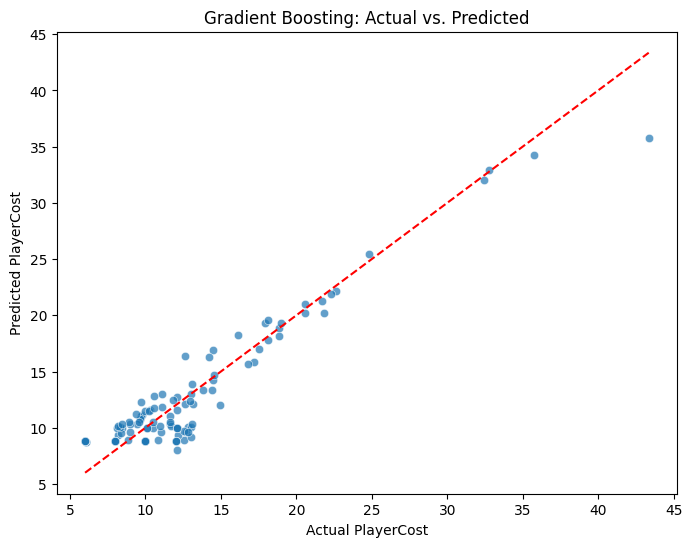

Model Performance Comparison:
               Model      RMSE        R²
0  Linear Regression  1.850735  0.906540
1      Random Forest  2.015932  0.889111
2  Gradient Boosting  1.956383  0.895565

Best Model Selected: Linear Regression (R² = 0.907, RMSE = 1.851)


In [13]:
# Cell 1: Model Comparison and Visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target (you can add more features if available)
features = rdf[['xG', 'xAG']]
target = rdf['PlayerCost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define a dictionary with models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = []

# Loop through each model, train, predict, and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Manually compute RMSE
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'RMSE': rmse, 'R²': r2})

    # Visualization: Scatter plot of actual vs. predicted values
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.xlabel('Actual PlayerCost')
    plt.ylabel('Predicted PlayerCost')
    plt.title(f'{name}: Actual vs. Predicted')
    # Plot the ideal prediction line (y = x)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()

# Summarize the results in a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

# Identify the best model based on the highest R² value
best_model_info = max(results, key=lambda x: x['R²'])
best_model_name = best_model_info['Model']
print(f"\nBest Model Selected: {best_model_name} (R² = {best_model_info['R²']:.3f}, RMSE = {best_model_info['RMSE']:.3f})")

# Retrieve the best model instance (this will be used in Cell 2)
best_model_instance = models[best_model_name]
